# The equations of linear elasticity

Linear elasticity is the study of how solid objects deform and become 
internally stressed due to prescribed loading conditions. It is an important problem
in modern engineering. Its corresponding PDE is a generalization of the
Poisson equation, and it is among one of the most popular PDEs in 
engineering. We now study its variational formulation and how to solve
this problem using FEniCS in 2D and 3D.

## PDE problem

The equation governing elastic 
deformations of a body $\Omega$ can be written as

\begin{equation}
\label{ftut:elast:varform:equilibrium}
-\boldsymbol{\nabla}\cdot\boldsymbol{\sigma} = \boldsymbol{f}\hbox{ in }\Omega,
\end{equation}

where $\boldsymbol{\sigma}$ is the stress tensor, $\boldsymbol{f}$ is the body force per unit
volume. For isotropic materials, the stress tensor is further related to the deformation by 
the following two equations:
\begin{align}
\boldsymbol{\sigma} &= \lambda\,\hbox{tr}\,(\boldsymbol{\varepsilon}) \boldsymbol{I} + 2\mu\boldsymbol{\varepsilon},
\label{ftut:elast:varform:stresstrain}\\
\boldsymbol{\varepsilon} &= \frac{1}{2}\left(\boldsymbol{\nabla} \boldsymbol{u} + (\boldsymbol{\nabla} \boldsymbol{u})^{\top}\right),
\label{ftut:elast:varform:strainu}
\end{align}
where $\boldsymbol{\varepsilon}$ is the symmetric strain-rate tensor (symmetric gradient), 
and $\boldsymbol{u}$ is the displacement vector field, $\boldsymbol{I}$ denotes the identity tensor, 
$\mathrm{tr}$ denote the trace operator on a tensor, and $\lambda$ and $\mu$ 
are material properties known as *Lamé's elasticity parameters*.

We can combine (\ref{ftut:elast:varform:stresstrain}) and
(\ref{ftut:elast:varform:strainu}) to obtain
\begin{equation}
\label{ftut:elast:varform:stressu}
\boldsymbol{\boldsymbol{\sigma}} = \lambda(\boldsymbol{\nabla}\cdot \boldsymbol{u})\boldsymbol{I} + \mu(\boldsymbol{\nabla} \boldsymbol{u} + (\boldsymbol{\nabla} \boldsymbol{u})^{\top})
\end{equation}

Note that
(\ref{ftut:elast:varform:equilibrium})--(\ref{ftut:elast:varform:strainu})
can easily be transformed to a single vector PDE for $\boldsymbol{u}$, which is the
governing PDE for the unknown $\boldsymbol{u}$ (Navier's equation).  In the
derivation of the variational formulation, however, it is convenient
to keep the equations split as above.

## Variational formulation

The variational formulation of
(\ref{ftut:elast:varform:equilibrium})--(\ref{ftut:elast:varform:strainu})
consists of forming the inner product of
(\ref{ftut:elast:varform:equilibrium}) and a *vector* test function
$\boldsymbol{v}\in \hat{V}$, where $\hat{V}$ is a vector-valued test function space, and
integrating over the domain $\Omega$:

$$ -\int_\Omega (\boldsymbol{\nabla}\cdot\boldsymbol{\sigma}) \cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x} =
\int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x},$$
where $\mathrm{d}\boldsymbol{x}$ denotes the volume measure.

Since $\boldsymbol{\nabla}\cdot\boldsymbol{\sigma}$ contains second-order derivatives of the primary
unknown $\boldsymbol{u}$, we integrate this term by parts:

\begin{equation}
-\int_\Omega (\boldsymbol{\nabla}\cdot\boldsymbol{\sigma}) \cdot \boldsymbol{v} \ \mathrm{d}\boldsymbol{x}
= \int_\Omega \boldsymbol{\sigma} : \boldsymbol{\nabla} \boldsymbol{v} \ \mathrm{d}\boldsymbol{x} - \int_{\partial\Omega}
(\boldsymbol{\sigma}\cdot \boldsymbol{n})\cdot \boldsymbol{v} \ \mathrm{d}\boldsymbol{x},
\label{eq:elast:varform:integbypart}
\end{equation}

where the colon operator is the inner product between tensors (summed
pairwise product of all elements), and $\boldsymbol{n}$ is the outward unit normal
at the boundary. The quantity $\boldsymbol{\sigma}\cdot \boldsymbol{n}$ is known as the
*traction* or stress vector at the boundary, and is often prescribed
as a boundary condition on a part $\partial\Omega_T$ of the boundary 
as $\boldsymbol{\sigma}\cdot \boldsymbol{n} = \boldsymbol{T}$, whereas the 
remaining part of the boundary would have the value of the displacements prescribed.

Substituting (\ref{eq:elast:varform:integbypart}) into (\ref{ftut:elast:varform:equilibrium}), 
we thus obtain
\begin{equation}
\int_\Omega \boldsymbol{\sigma} : \boldsymbol{\nabla} \boldsymbol{v}\ \mathrm{d}\boldsymbol{x} =
\int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x}
+ \int_{\partial\Omega} \boldsymbol{T}\cdot \boldsymbol{v}\ \mathrm{d}S\boldsymbol{s},
\label{eq:elast:varform:varform_original}
\end{equation}
where $\mathrm{d}S\boldsymbol{s}$ is a measure in surface area.

Inserting the expression (\ref{ftut:elast:varform:stressu}) for
$\sigma$ gives the variational form with $\boldsymbol{u}$ as unknown. 

### Symmetrizing $\boldsymbol{\nabla} \boldsymbol{v}$

One can show that the inner product of a symmetric tensor $\boldsymbol{A}$ and an
anti-symmetric tensor $\boldsymbol{B}$ vanishes. If we express $\boldsymbol{\nabla} \boldsymbol{v}$ as a sum
of its symmetric and anti-symmetric parts, only the symmetric part will
survive in the product $\boldsymbol{\sigma} :\boldsymbol{\nabla} \boldsymbol{v}$ since $\sigma$ is a
symmetric tensor. Thus replacing $\boldsymbol{\nabla} \boldsymbol{u}$ by the symmetric gradient
$\boldsymbol{\epsilon}(\boldsymbol{u})$ gives rise to the slightly different variational form

\begin{equation}
\int_\Omega \boldsymbol{\sigma} : \boldsymbol{\epsilon}(\boldsymbol{v})\ \mathrm{d}\boldsymbol{x} =
\int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x}
+ \int_{\partial\Omega} \boldsymbol{T}\cdot \boldsymbol{v}\ \mathrm{d}S\boldsymbol{s}
\label{ftut:elast:varform:sigma_inner_gradv}
\end{equation}

where $\boldsymbol{\epsilon}(\boldsymbol{v})$ is the symmetric part of $\boldsymbol{\nabla} \boldsymbol{v}$:
\begin{equation}
\boldsymbol{\epsilon}(\boldsymbol{v}) = \frac{1}{2}\left(\boldsymbol{\nabla} \boldsymbol{v} + (\boldsymbol{\nabla} \boldsymbol{v})^{\top}\right).
\label{ftut:elast:varform:sigma_inner_eps}
\end{equation}

The formulation (\ref{ftut:elast:varform:sigma_inner_gradv}) is what naturally
arises from the minimization of elastic potential energy, and is a more
popular formulation than (\ref{eq:elast:varform:varform_original}).

Here, $\boldsymbol{\epsilon}$ is a useful operator. The symmetric strain-rate tensor $\boldsymbol{\varepsilon}$ is equal to $\boldsymbol{\epsilon}(\boldsymbol{u})$. 

### Enforcing boundary conditions

Now let us consider how to enforce boundary conditions. 
For Dirichlet boundaries, we will enforce boundary-conditions strongly.
For these points, no test functions are associated with the Dirichlet nodes.

For traction boundary conditions, we will enforce the boundary condition
weakly using the variational form (\ref{ftut:elast:varform:sigma_inner_gradv}).
Similar to the Poisson equation, we require their corresponding test
functions $\boldsymbol{v}$ vanish along $\partial \Omega$ for interior points.
Then, the boundary integral above has no effects for points on
$\partial\Omega\setminus\partial\Omega_T$. It might be conceptually
simpler to replace 
$\partial\Omega$ with $\partial\Omega_T$ in the variational formulation
and obtain an alternative variational form
$$
\int_\Omega \boldsymbol{\sigma} : \varepsilon(\boldsymbol{v})\ \mathrm{d}S\boldsymbol{s} =
\int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x}
+ \int_{\partial\Omega_T} \boldsymbol{T}\cdot \boldsymbol{v}\ \mathrm{d}S\boldsymbol{s}.
$$
However, we shall consider the form (\ref{ftut:elast:varform:sigma_inner_gradv}).

Other important boundary conditions include the *sliding boundary
conditions*,
$$\boldsymbol{u}(\boldsymbol{x})\cdot\boldsymbol{n}(\boldsymbol{x})=0,\quad \mbox{ for }\boldsymbol{x}\in\partial\Omega_{S},$$
and *frictions boundary conditions*, which specify the tangential components of 
surface forces analogous to the source term $\boldsymbol{f}$ but are applied on 
surfaces only. These boundary conditions require additional care, which we will 
address later.

### Summary of variational form
In summary, the variational problem is to find $\boldsymbol{u}$ in a vector function space $V$ such that
\begin{equation}
a(\boldsymbol{u},\boldsymbol{v}) = L(\boldsymbol{v})\quad\forall \boldsymbol{v}\in\hat{V},
\end{equation}
where 
\begin{align}
a(\boldsymbol{u},\boldsymbol{v}) &= \int_\Omega\sigma(\boldsymbol{u}) :\varepsilon(\boldsymbol{v})\ \mathrm{d}\boldsymbol{x},\\
L(\boldsymbol{v}) &= \int_\Omega \boldsymbol{f}\cdot \boldsymbol{v}\ \mathrm{d}\boldsymbol{x} + \int_{\partial\Omega_T} \boldsymbol{T}\cdot \boldsymbol{v}\ \mathrm{d}S\boldsymbol{s},
\end{align}
and 
\begin{equation}
\boldsymbol{\sigma}(\boldsymbol{u}) = \lambda(\boldsymbol{\nabla}\cdot \boldsymbol{u})\boldsymbol{I} + \mu(\boldsymbol{\nabla} \boldsymbol{u} + (\boldsymbol{\nabla} \boldsymbol{u})^{\top}).\\
\end{equation}

## FEniCS implementation

To demonstrate the implementation, we will model a clamped beam deformed under its
own weight in 3D. This can be modeled by setting the right-hand side
body force per unit volume to $\boldsymbol{f}=(0,0,-\rho g)$ with $\rho$ the
density of the beam and $g$ the acceleration of gravity. The beam is
box-shaped with length $L$ and has a square cross section of width $W$. We
set $\boldsymbol{u}=(0,0,0)$ at the clamped end, $x=0$. The rest of the boundary is
traction free; that is, we set $\boldsymbol{T} = 0$. Therefore,
$$L(\boldsymbol{v}) = \int_\Omega \boldsymbol{f}\cdot \boldsymbol{v} \mathrm{d}\boldsymbol{x}$$
for this problem.

<img src="https://fenicsproject.org/pub/tutorial/html/fig/elasticity.png" width="400">

### Import packages

We start by importing fenics and enforcing matplotlib. In addition, we import mshr for mesh generation.

In [1]:
from fenics import *

%matplotlib inline

### Generate the mesh and function spaces

Our action startes by generating meshes and defining function spaces.

In [2]:
# Create mesh and define function space
length = 1; width = 0.2

mesh = BoxMesh(Point(0, 0, 0), Point(length, width, width), 10, 3, 3)
V = VectorFunctionSpace(mesh, 'P', 1)

### Define boundary conditions

We only specify the Dirichlet boundary condition. For the boundary condition 
$u=(0, 0, 0)$, we must set a vector value to zero, not just a scalar. 
We specify the vector constant as `Constant((0, 0, 0))`.

In [3]:
# Define boundary condition
tol = 1E-14

def clamped_boundary(x, on_boundary):
    return on_boundary and x[0] < tol

bc = DirichletBC(V, Constant((0, 0, 0)), clamped_boundary)

### Define the variational problem

The primary unknown is now a vector field $\boldsymbol{u}$ and not a scalar field,
so we need to work with a vector function space. We will use 
piecewise-linear basis functions for all the components.


In [4]:
u = TrialFunction(V)
v = TestFunction(V)

With `u = TrialFunction(V)` we get `u` as a vector-valued finite element
function with three components for this 3D problem.

Next, we define the stress tensor and $a$. The gradient and divergence operators 
now have a prefix `nabla_`.
This is not strictly necessary in the present problem, but is
recommended in general for vector PDEs arising from continuum mechanics,
if you interpret $\boldsymbol{\nabla}$ as a vector in the PDE notation. See
the notes on `grad(u)` vs. `nabla_grad(u)` below.

In [5]:
# Define strain and stress
def epsilon(u):
    return 0.5*(nabla_grad(u) + nabla_grad(u).T)
    #return sym(nabla_grad(u))

beta = 1.25
lambda_ = beta
mu = 1
d = u.geometric_dimension()  # space dimension

def sigma(u):
    return lambda_*nabla_div(u)*Identity(d) + 2*mu*epsilon(u)

# Define a
a = inner(sigma(u), epsilon(v))*dx

To define $L$, $\boldsymbol{f}=(0, 0, \rho*g)$ is a constant vector, instead of a scalar.
Such a vector constant is specified as `Constant(0, 0, -rho*g)` in FEniCS.

In [6]:
# Define L
rho = 1.
delta = width/length
gamma = 0.4*delta**2
g = gamma

f = Constant((0, 0, -rho*g))
L = dot(f, v)*dx

### Solve the variational problem

Finally, we can solve the problem.

In [7]:
# Compute solution
u = Function(V)
solve(a == L, u, bc)

## Post-processing

### Plot the solution

We shall plot the solution as displacements.

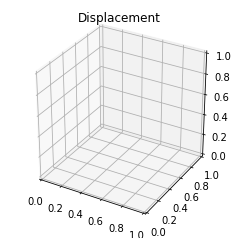

In [8]:
# Plot solution
plot(u, title='Displacement', mode='displacement')

From the displacements `u`, we can compute various stress measures. 
We will compute the von Mises stress defined as
$$\boldsymbol{\sigma}_M = \sqrt{\frac{3}{2}\boldsymbol{s}:\boldsymbol{s}},$$
where $\boldsymbol{s}$ is the deviatoric stress tensor
$$\boldsymbol{s} = \boldsymbol{\sigma} - \frac{1}{3}\mathrm{tr}\,(\boldsymbol{\sigma})\,\boldsymbol{I}.$$
There is a one-to-one mapping between these formulas and the FEniCS code,
where we compute the `von_Mises` variable by projecting it to the finite element space.

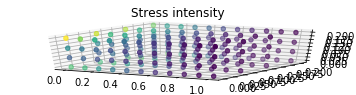

In [9]:
# Plot stress
s = sigma(u) - (1./3)*tr(sigma(u))*Identity(d)  # deviatoric stress
von_Mises = sqrt(3./2*inner(s, s))
V = FunctionSpace(mesh, 'P', 1)
von_Mises = project(von_Mises, V)
plot(von_Mises, title='Stress intensity')

We also evaluate the magnitude of displacements.

min/max u: -3.87970475137e-06 0.154585383323


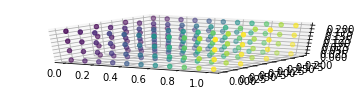

In [10]:
# Compute magnitude of displacement
u_magnitude = sqrt(dot(u, u))
u_magnitude = project(u_magnitude, V)
plot(u_magnitude, 'Displacement magnitude')
print('min/max u:',
      u_magnitude.vector().array().min(),
      u_magnitude.vector().array().max())

## Note on `grad(u)` vs. `nabla_grad(u)`

For scalar functions, $\boldsymbol{\nabla} u$ has a clear meaning as the vector
$$\nabla u =\left(\frac{\partial u}{\partial x}, \frac{\partial u}{\partial y},
\frac{\partial u}{\partial z}\right).$$

However, for a vector-valued function $\boldsymbol{u}$, the meaning is less clear.
Some sources define $\boldsymbol{\nabla}\boldsymbol{u}$ as the matrix with elements
$\partial u_j / \partial x_i$, especially in continuum mechanics.
Some other sources prefer $\partial u_i / \partial x_j$, namely the 
*Jacobian matrix*.

In our notes, $\boldsymbol{\nabla}$ always denotes the matrix 
with elements $\partial u_j / \partial x_i$, to be consistent with most PDEs.
The corresponding operator in FEniCS is `nabla_grad(u)`.
We will use $\mbox{Jac}(\boldsymbol{u})$ to denote the Jacobian matrix of $\boldsymbol{u}$,
whose corresponding operator in FEniCS is `grad(u)`.

## Additional notes on linear elasticity

### Scaling

It is often advantageous to scale a problem as it reduces the need for setting
physical parameters, and one obtains dimensionsless numbers that
reflect the competition of parameters and physical effects. We develop
the code for the original model with dimensions, and run the scaled
problem by tweaking parameters appropriately. Scaling reduces the
number of active parameters from 6 to 2 for the present application.

In Navier's equation for $u$, arising from inserting
(\ref{ftut:elast:varform:stresstrain}) and
(\ref{ftut:elast:varform:strainu}) into
(\ref{ftut:elast:varform:equilibrium}),

$$ -(\lambda + \mu)\boldsymbol{\nabla}(\boldsymbol{\nabla}\cdot \boldsymbol{u}) - \mu\boldsymbol{\nabla}^2 \boldsymbol{u} = \boldsymbol{f},$$

we insert coordinates made dimensionless by $L$, and $\bar{\boldsymbol{u}}=\boldsymbol{u}/U$,
which results in the dimensionless governing equation

$$
-\beta\bar{\boldsymbol{\nabla}}(\bar{\boldsymbol{\nabla}}\cdot\bar{\boldsymbol{u}})-\bar{\boldsymbol{\nabla}}^{2}\bar{\boldsymbol{u}}=\bar{\boldsymbol{f}},\quad\bar{\boldsymbol{f}}=(0,0,\gamma),
,$$
where $\beta = 1 + \lambda/\mu$ is a dimensionless elasticity parameter and

$$ \gamma = \frac{\rho gL^2}{\mu U}$$
is a dimensionless variable reflecting the ratio of the load
$\rho g$ and the shear stress
term $\mu\boldsymbol{\nabla}^2 \boldsymbol{u}\sim \mu U/L^2$ in the PDE.

One option for the scaling is to choose $U$ such that $\gamma$ is of
unit size ($U = \rho gL^2/\mu$). However, in elasticity, this leads
to displacements of the size of the geometry, which makes plots
look very strange. Therefore, we want the characteristic displacement
to be a small fraction of the characteristic length of the geometry.
This can be achieved by choosing $U$ equal to the maximum deflection
of a clamped beam, for which there actually exists a formula: $U =
\frac{3}{2}\rho gL^2\delta^2/E$, where $\delta = L/W$ is a
parameter reflecting how slender the beam is, and $E$ is the modulus
of elasticity. Thus, the dimensionless parameter $\delta$ is very
important in the problem (as expected, since $\delta\gg 1$ is what
gives beam theory!). Taking $E$ to be of the same order as $\mu$,
which is the case for many materials, we realize that $\gamma \sim
\delta^{-2}$ is an appropriate choice.  Experimenting with the code to
find a displacement that ``looks right'' in plots of the deformed
geometry, points to $\gamma = 0.4\delta^{-2}$ as our final choice of
$\gamma$.

The simulation code implements the problem with dimensions and
physical parameters $\lambda$, $\mu$, $\rho$, $g$, $L$, and $W$.
However, we can easily reuse this code for a scaled problem: just set
$\mu = \rho = L = 1$, $W$ as $W/L$ ($\delta^{-1}$), $g=\gamma$, and
$\lambda=\beta$.

### Sliding and frictions boundary conditions
For sliding boundary conditions, should we enforce them strongly (i.e., node-wise,
similar to Dirichlet boundary conditions) or weakly (i.e., in the variational form
similar to traction boundary conditions)?

A proper mathematical formulation is to decompose the variational form 
(\ref{ftut:elast:varform:sigma_inner_gradv}) into tangential and normal 
directions for boundary nodes. Along the normal direction, we enforce
the BC strongly. 

For simplicity, let us assume the surface is flat. Let $\Gamma_S$ denote the 
part of $\partial\Omega$ where sliding boundary conditions are imposed. 
We then have
\begin{equation}
\int_{\Gamma_{S}}\boldsymbol{\sigma}_{S}:\boldsymbol{\nabla}_{S}\boldsymbol{v}\ \mathrm{d}S\boldsymbol{s}=\int_{\Gamma_{S}}\tilde{\boldsymbol{f}}_{S}\cdot\boldsymbol{v}\ \mathrm{d}S\boldsymbol{s}+\int_{\partial\Gamma_{S}}\boldsymbol{T}_{l}\cdot\boldsymbol{v}\ \mathrm{d}s,
\end{equation}
where $\boldsymbol{\nabla}_S$ denotes the surface gradient operator within $S$, $\boldsymbol{\sigma}_S$ denotes the 
traction within $\Gamma_S$, $\partial\Gamma_S$ denotes the boundary of $\partial\Gamma_S$, 
$\tilde{\boldsymbol{f}}$ denotes the body force modified by frictions, and
$\boldsymbol{T}_{l}=\boldsymbol{T}\cdot\boldsymbol{n}_l$, denotes the stress tensor
dotted with the ourward normal of $\partial\Gamma_{S}$, and $\mathrm{d}s$ denotes
a line integral along $\partial\Gamma_S$. This allows a more unified treatment 
of sliding and frictions boundary conditions.

For curved surfaces, the equations will be more complicated and will involve 
surface differential operators.

### Anisotropic elasticity
We can easily allow for anisotropic materials since
(\ref{ftut:elast:varform:sigma_inner_eps}) is just the inner product of
the stress tensor and the strain tensor. Anisotropic elasticity is
easiest to deal with by having a 6-vector with the unique components of
stress and strain and relate the 6-vectors through a $6\times 6$
elasticity matrix $\boldsymbol{D}$: $\boldsymbol{\sigma} = \boldsymbol{D}\boldsymbol{\varepsilon}$. We then form the
inner product of $\boldsymbol{\sigma}$ and $\boldsymbol{\varepsilon}$ to be $\boldsymbol{\varepsilon}^T \boldsymbol{D}\boldsymbol{\varepsilon}$.

**Acknowledgment**: This notebook was adapted from [The FEniCS Tutorial Volume I](https://fenicsproject.org/pub/tutorial/sphinx1/) by Hans Petter Langtangen and Anders Logg, released under CC Attribution 4.0 license. The part on sliding and frictions boundary conditions is by the author.